In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik.report import plot_correlation_matrix
from phik import report
import warnings
warnings.filterwarnings('ignore')

### np.random.normal позволяет сгенерировать нормально распределенные данные
- loc - центр нашего распределения
- scale - стандартное отклонение
- size - размер выборки

In [3]:
data = pd.Series(np.random.normal(loc=5, scale=1, size=2000))
data.head(5)

0    4.255326
1    4.039098
2    4.017638
3    4.186758
4    5.000336
dtype: float64

In [4]:
print(f'''Среднее - {data.mean()},
Медиана - {data.median()},
Стандартное отклонение - {data.std()},
Дисперсия - {data.var()}
''')

Среднее - 4.998809731032733,
Медиана - 5.007148555164388,
Стандартное отклонение - 1.0211688994755412,
Дисперсия - 1.042785921256088



In [5]:
data.describe()

count    2000.000000
mean        4.998810
std         1.021169
min         1.343962
25%         4.305245
50%         5.007149
75%         5.671609
max         8.548750
dtype: float64

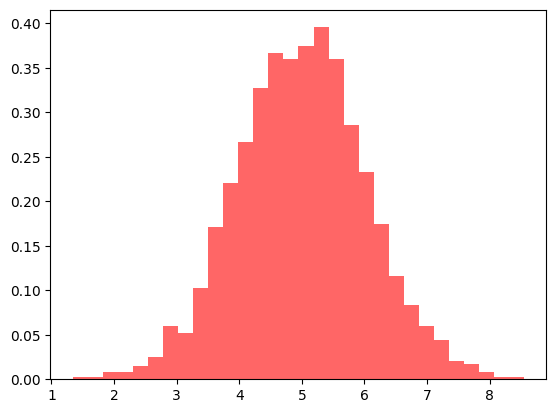

In [6]:
plt.hist(data, bins=30, density=True, alpha=0.6, color='r', label='Гистограмма')
plt.show()

In [7]:
df = pd.DataFrame({
    'x': data,
    'y': pd.Series(np.concatenate([np.random.normal(10, 1, 1950), np.random.normal(20, 1, 50)]))
})

df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,2000.0,4.99881,1.021169,1.343962,4.305245,5.007149,5.671609,8.548750
y,2000.0,10.21463,1.885160,6.444833,9.288222,9.981486,10.680636,22.023316


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


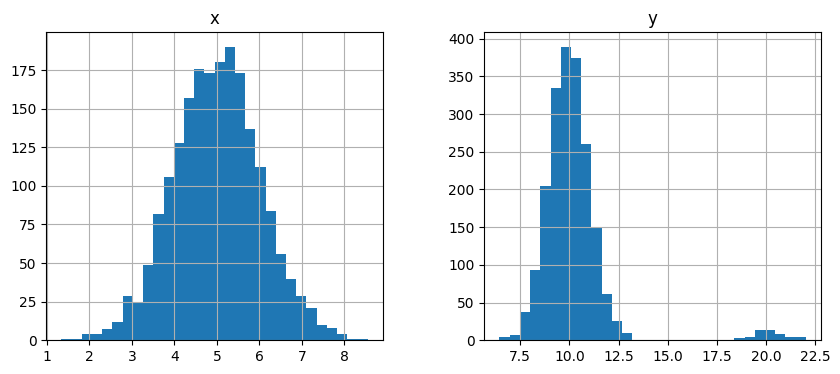

In [9]:
df.hist(bins=30, figsize=(10, 4))
plt.show()

<h2>Проверка гипотез с помощью python</h2>

<h4>Двусторонний тест</h4>

- scipy.stats.ttest_1samp()
##### Выполняет t-критерий Сьюдента, возвращает статистику разности и p-value

In [10]:
alpha = .05

_, pvalue = stats.ttest_1samp(df.x, popmean=5)

if pvalue < .05:
    print(f'pvalue = {round(pvalue, 2)}. Нулевая гипотеза отвергается')
else:
    print(f'pvalue = {round(pvalue, 2)}. Нулевая гипотеза принимается')

pvalue = 0.96. Нулевая гипотеза принимается


- Этот тест сравнивает выборку с каким-то средним значением

<h4>Односторонний тест (в какую сторону)</h4>

In [11]:
alpha = .05
needed_value = 5

_, pvalue = stats.ttest_1samp(df.x, popmean=5)

pvalue /= 2

if (pvalue < .05) and (df.x.mean() < needed_value):
    print(f'pvalue = {round(pvalue, 2)}. Нулевая гипотеза отвергается')
else:
    print(f'pvalue = {round(pvalue, 2)}. Нулевая гипотеза принимается')

pvalue = 0.48. Нулевая гипотеза принимается


### Равенство средних двух совокупностей
- ttest_ind() сравнивает две независимых совокупности

In [29]:
a = df.x.sample(1000)
b = df.x.sample(1000)

alpha = .05

_, pvalue = stats.ttest_ind(df.x, df.x)

if (pvalue < .05):
    print(f'pvalue = {round(pvalue, 2)}. Нулевая гипотеза отвергается')
else:
    print(f'pvalue = {round(pvalue, 2)}. Нулевая гипотеза принимается')

pvalue = 1.0. Нулевая гипотеза принимается


- ttest_rel() сравнивает две зависимых совокупности

In [13]:
a = df.x.sample(1000)
b = df.x.sample(1000) * 1.01

alpha = .05

_, pvalue = stats.ttest_rel(a, b)

if (pvalue < .05):
    print(f'pvalue = {round(pvalue, 2)}. Нулевая гипотеза отвергается')
else:
    print(f'pvalue = {round(pvalue, 2)}. Нулевая гипотеза принимается')

pvalue = 0.09. Нулевая гипотеза принимается


- С помощью этого метода проверяются данные, которые изменяются с течением времени

<h3>Одномерный анализ</h3>

# Гипотезы
- H0 - данные имеют нормальное распределение по Гауссу
- H1 - данные не имеют нормального распределения по Гауссу

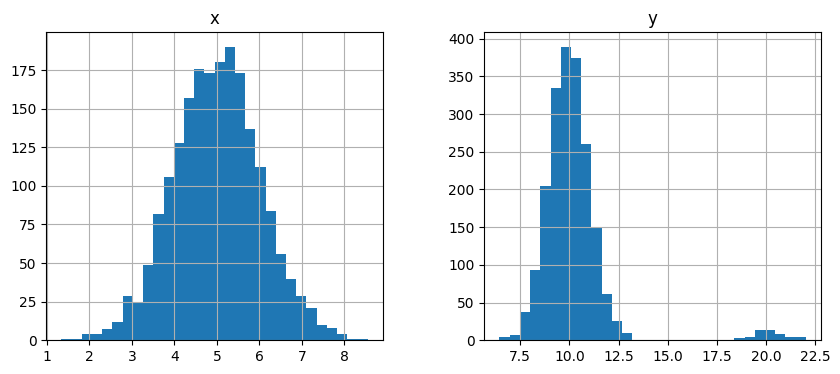

In [14]:
df.hist(figsize=(10, 4), bins=30)
plt.show()

### Тест Шапиро-Уилка
!!! Тест Шапиро-Уилка лучше не использовать для выборок размером свыше 5000. Могут быть ошибочные данные !!!

In [15]:
_, pvalue = stats.shapiro(df.x)

if pvalue < .05:
    print(f'pvalue = {pvalue}. Данные НЕ распределены нормально')
else:
    print(f'pvalue = {pvalue}. Данные распределены нормально')

pvalue = 0.9463242776760892. Данные распределены нормально


### Тест K'2-тест Д'Агостино

In [16]:
_, pvalue = stats.normaltest(df.x)

if pvalue < .05:
    print(f'pvalue = {pvalue}. Данные НЕ распределены нормально')
else:
    print(f'pvalue = {pvalue}. Данные распределены нормально')

pvalue = 0.8217910223097855. Данные распределены нормально


### Критерий Андерсона-Дарлинга

In [17]:
result = stats.anderson(df.x)

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f}% : критическое значение {cv:.3f}, данные выглядят нормально (не удается отклонить H0)')
    else:
        print(f'Уровень значимости {sl:.2f}% : критическое значение {cv:.3f}, данные не выглядят нормально (отклоняем H0)')

Уровень значимости 15.00% : критическое значение 0.575, данные выглядят нормально (не удается отклонить H0)
Уровень значимости 10.00% : критическое значение 0.655, данные выглядят нормально (не удается отклонить H0)
Уровень значимости 5.00% : критическое значение 0.785, данные выглядят нормально (не удается отклонить H0)
Уровень значимости 2.50% : критическое значение 0.916, данные выглядят нормально (не удается отклонить H0)
Уровень значимости 1.00% : критическое значение 1.090, данные выглядят нормально (не удается отклонить H0)


### Двумерный анализ
- H0 - два признака независимы
- H1 - два признака зависимы

##### Числовые - числовые
- Коэффицент корреляции Пирсона
- Предполагает, что наборы данных должны быть нормально распределены

In [18]:
correlation, pvalue = stats.pearsonr(df.x, df.y)

print(f'Корреляция равна {correlation}')
if pvalue < .05:
    print(f'pvalue = {pvalue}. Данные между собой зависимы')
else:
    print(f'pvalue = {pvalue}. Данные между собой НЕзависимы')

Корреляция равна 0.030607423061402614
pvalue = 0.1712274596744438. Данные между собой НЕзависимы


In [19]:
x1 = df.x * 1.1

correlation, pvalue = stats.pearsonr(df.x, x1)

print(f'Корреляция равна {correlation}')
if pvalue < .05:
    print(f'pvalue = {pvalue}. Данные между собой зависимы')
else:
    print(f'pvalue = {pvalue}. Данные между собой НЕзависимы')

Корреляция равна 1.0
pvalue = 0.0. Данные между собой зависимы


##### Непрерывные или порядковые величины
- Коэффицент корреляции Спирмена
- НЕ предполагает, что наборы данных должны быть нормально распределены

In [20]:
correlation, pvalue = stats.spearmanr(df.x, df.y)

print(f'Корреляция равна {correlation}')
if pvalue < .05:
    print(f'pvalue = {pvalue}. Данные между собой зависимы')
else:
    print(f'pvalue = {pvalue}. Данные между собой НЕзависимы')

Корреляция равна 0.03828321957080489
pvalue = 0.08696400748224313. Данные между собой НЕзависимы


In [21]:
correlation, pvalue = stats.spearmanr(df.x, x1)

print(f'Корреляция равна {correlation}')
if pvalue < .05:
    print(f'pvalue = {pvalue}. Данные между собой зависимы')
else:
    print(f'pvalue = {pvalue}. Данные между собой НЕзависимы')

Корреляция равна 1.0
pvalue = 0.0. Данные между собой зависимы


##### Числовые и порядковые
- Коэффицент корреляции т-тест Кендалл Тау

In [22]:
serial_data = [0, 1, 2]
df['z'] = np.random.choice(a=serial_data, size=len(df))

correlation, pvalue = stats.kendalltau(df.x, df.z)

print(f'Корреляция равна {correlation}')
if pvalue < .05:
    print(f'pvalue = {pvalue}. Данные между собой зависимы')
else:
    print(f'pvalue = {pvalue}. Данные между собой НЕзависимы')

Корреляция равна -0.0004815414287020081
pvalue = 0.9776950541519577. Данные между собой НЕзависимы


In [23]:
df['z'] = df['x'].apply(lambda x: 0 if x < 5 else 1)

correlation, pvalue = stats.kendalltau(df.x, df.z)

print(f'Корреляция равна {correlation}')
if pvalue < .05:
    print(f'pvalue = {pvalue}. Данные между собой зависимы')
else:
    print(f'pvalue = {pvalue}. Данные между собой НЕзависимы')

Корреляция равна 0.7072662955396667
pvalue = 0.0. Данные между собой зависимы


##### Категориальные и категориальные
- chi-квадрат

In [24]:
df['w'] = np.random.choice(serial_data, len(df))
pd.crosstab(df.z, df.w)

w,0,1,2
z,,,
0,338,341,314
1,332,336,339


In [25]:
crosstable = pd.crosstab(df.z, df.w)
stat, pvalue, _, _ = stats.chi2_contingency(crosstable)
print(f'stat = {stat}')
if pvalue < .05:
    print(f'pvalue = {pvalue}. Данные между собой зависимы')
else:
    print(f'pvalue = {pvalue}. Данные между собой НЕзависимы')

stat = 0.9498264867344688
pvalue = 0.6219390114589292. Данные между собой НЕзависимы


In [26]:
df.j = df.w.apply(lambda x: 1 if x == 0 else 0)

crosstable = pd.crosstab(df.j, df.w)
stat, pvalue, _, _ = stats.chi2_contingency(crosstable)
print(f'stat = {stat}')
if pvalue < .05:
    print(f'pvalue = {pvalue}. Данные между собой зависимы')
else:
    print(f'pvalue = {pvalue}. Данные между собой НЕзависимы')

stat = 2000.0000000000005
pvalue = 0.0. Данные между собой зависимы


## Многомерный анализ
##### Мультиколлинеарность
- Когда два или более признаков коррелируют между собой - это плохо. Мы стараемся этого избегать

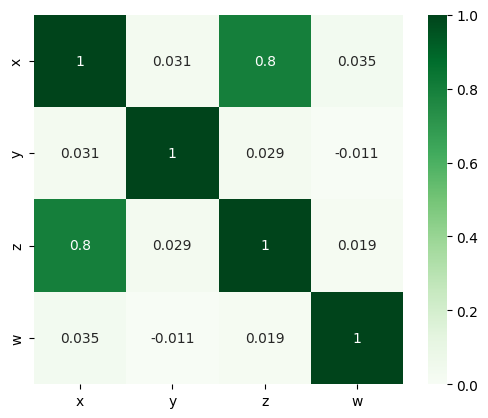

In [27]:
corrs = df.corr()

sns.heatmap(corrs, cmap='Greens', square=True, vmin=0, annot=True)
plt.show()

### Метод многомерного анализа - Phik-корреляция
- Считает не только линейную, но и нелинейную корреляцию

interval columns not set, guessing: ['x', 'y', 'z', 'w']


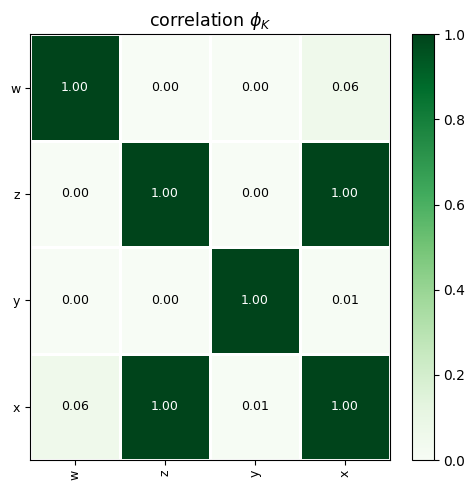

In [28]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(5, 5))
plt.tight_layout()
plt.show()